# Data Preprocessing

This notebook focuses on importing the data and turning it into MFCCs for the model to learn from. This approach is discussed more in blog week 5.

Librosa is a python package for manipulating data. It includes several useful functions, including being able to manipulate audio data into MFCCs or Spectrograms. Numpy is used to create large arrays to load the data into.

In [2]:
import librosa
import numpy as np

The code below will read in a file, and convert it to and MFCC using Librosa.

In [3]:
file_name = "../Datasets/final/eval_balanced/Emergency/4.wav"
audio, sample_rate = librosa.load(file_name)

In [4]:
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 430)


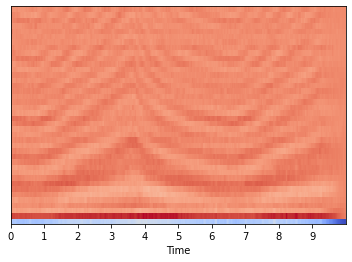

In [5]:
import librosa.display

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [6]:
import IPython.display
from IPython.display import Audio
Audio(file_name)

## Get MFCC for every file

Create a function which will extract the features for a file given. Then create a loop that will go through every file, label it as emergency or non-emergency and add it to a list. Then turn this list into a Pandas DataFrame for the model to use.

// The below creates a csv file with the list of files and their classes for the feature extraction to work off. This removes the .DS store issue

In [58]:
emergency_train_dataset_path = '../Datasets/test/train_balanced/Emergency/'
non_emergency_train_dataset_path = '../Datasets/test/train_balanced/nonEmergency/'


import csv

with open("metadata.csv", 'w')as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["filename","class_name"])
    for file_name in os.listdir(emergency_train_dataset_path):
        csvwriter.writerow([file_name, "emergency"])
    for file_name in os.listdir(non_emergency_train_dataset_path):
        csvwriter.writerow([file_name, "non_emergency"])

In [59]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        return mfccsscaled
        
    except Exception as e:
        print("Error encountered while parsing file: " + file_name)
        return None

In [60]:
import pandas as pd
import os

In [61]:
features = []
for index,row in pd.read_csv("metadata.csv").iterrows():
    class_label = row["class_name"]
    if(class_label=="emergency"):
        data = extract_features(emergency_train_dataset_path + row["filename"])
        features.append([data, class_label])
    else:
        data = extract_features(non_emergency_train_dataset_path + row["filename"])
        features.append([data, class_label])


featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  2029  files


In [69]:
# OLD WAY WHICH CAUSED ISSUES WITH DS_store file
# emergency_train_dataset_path = '../Datasets/test/train_balanced/Emergency/'
# non_emergency_train_dataset_path = '../Datasets/test/train_balanced/nonEmergency/'

# features = []

# # Loop through all the data and append the MFCC to a list

# for file_name in os.listdir(emergency_train_dataset_path):
#     class_label = "emergency"
#     data = extract_features(emergency_train_dataset_path + file_name)
#     features.append([data, class_label])
    
# for file_name in os.listdir(non_emergency_train_dataset_path):
#     class_label = "nonEmergency"
#     data = extract_features(non_emergency_train_dataset_path + file_name)
#     features.append([data, class_label])    

# featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'])

# print("Finished feature extraction from ", len(featuresdf), ' files')

## Convert the data

Convert the data into a numpy array as well as the labels so the ML model can understand it. Store the data for use of training the model in another notebook.

In [68]:
# This was used to identify the problem with the .DS_Store file

# for f in featuresdf.feature:
#     try:
#         print(f.size)
#     except:
#         print(f)

In [63]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

In [65]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [66]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)
